**Prerequisites**

To start with Linear Regression, you must be aware of a few basic concepts of statistics. i.e.,

- Correlation (r) – Explains the relationship between two variables, possible values -1 to +1
- Variance (σ2)– Measure of spread in your data
- Standard Deviation (σ) – Measure of spread in your data (Square root of Variance)
- Normal distribution
- Residual (error term) – {Actual value – Predicted value}

# Linear Regression

Regression is a statistical way to establish a relationship between a dependent variable and a set of independent variable(s). e.g., if we say that

Age = 5 + Height * 10 + Weight * 13

Here we are establishing a relationship between Height & Weight of a person with his/ Her Age. This is a very basic example of Regression.

Linear regression models have many real-world applications in an array of industries such as economics (e.g. predicting growth), business (e.g. predicting product sales, employee performance), social science (e.g. predicting political leanings from gender or race), healthcare (e.g. predicting blood pressure levels from weight, disease onset from biological factors), and more.

The basic idea is that if we can fit a linear regression model to observed data, we can then use the model to predict any future values. For example, let’s assume that we have found from historical data that the price (P) of a house is linearly dependent upon its size (S) — in fact, we found that a house’s price is exactly 90 times its size. The equation will look like this:

P = 90*S

With this model, we can then predict the cost of any house. If we have a house that is 1,500 square feet, we can calculate its price to be:

P = 90*1500 = $135,000

---

There are two kinds of variables in a linear regression model:

- The input or predictor variable is the variable(s) that help predict the value of the output variable. It is commonly referred to as X.
- The output variable is the variable that we want to predict. It is commonly referred to as Y.

To estimate Y using linear regression, we assume the equation:

**Equation: Y = α + βX**

- Y = Dependent variable
- X = Independent variable
- α = Constant showing Y-intercept
- β = Constant showing slope of line

# Ordinary Least Squares

So, how do we estimate **α** and **β**? We can use a method called ordinary least squares.

![https://miro.medium.com/max/600/1*VVA0rF6MWXcw1JmRNFA87g.png](https://miro.medium.com/max/600/1*VVA0rF6MWXcw1JmRNFA87g.png)

The objective of the least squares method is to find values of α and β that minimise the sum of the squared difference between Y and Yₑ. We will not go through the derivation here, but using calculus we can show that the values of the unknown parameters are as follows:

![https://miro.medium.com/max/394/0*gR-W7RFar9ijxwAa](https://miro.medium.com/max/394/0*gR-W7RFar9ijxwAa)

where X̄ is the mean of X values and Ȳ is the mean of Y values.

If you are familiar with statistics, you may recognise β as simply
Cov(X, Y) / Var(X).

# The regression has five key assumptions:

- Linear relationship
- Multivariate normality
- No or little multicollinearity
- No auto-correlation
- Homoscedasticity

**1. First**, linear regression needs the relationship between the independent and dependent variables to be linear.  It is also important to check for outliers since linear regression is sensitive to outlier effects.  The linearity assumption can best be tested with scatter plots, the following two examples depict two cases, where no and little linearity is present.

![https://www.statisticssolutions.com/wp-content/uploads/2010/01/linearregression01.jpg](https://www.statisticssolutions.com/wp-content/uploads/2010/01/linearregression01.jpg)
![https://www.statisticssolutions.com/wp-content/uploads/2010/01/linearregression02.jpg](https://www.statisticssolutions.com/wp-content/uploads/2010/01/linearregression02.jpg)

**2. Secondly**, the linear regression analysis requires all variables to be multivariate normal.  This assumption can best be checked with a histogram

![https://www.statisticssolutions.com/wp-content/uploads/2010/01/linearregression03.jpg](https://www.statisticssolutions.com/wp-content/uploads/2010/01/linearregression03.jpg)

**3. Thirdly**, linear regression assumes that there is little or no multicollinearity in the data.  Multicollinearity occurs when the independent variables are too highly correlated with each other.

Multicollinearity may be tested using Correlation matrix – when computing the matrix of Pearson’s Bivariate Correlation among all independent variables the correlation coefficients need to be smaller than 1.

**Note:** If multicollinearity is found in the data, centering the data (that is deducting the mean of the variable from each score) might help to solve the problem.

**4. Fourth**, linear regression analysis requires that there is little or no autocorrelation in the data.  Autocorrelation occurs when the residuals are not independent from each other.  For instance, this typically occurs in stock prices, where the price is not independent from the previous price.

**Autocorrelation** is a measure of similarity (correlation) between adjacent data points; It is where data points are affected by the values of points that came before.

https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/

**5. The last assumption** of the linear regression analysis is homoscedasticity (same variance).  The scatter plot is good way to check whether the data are homoscedastic (meaning the residuals are equal across the regression line).  The following scatter plots show examples of data that are not homoscedastic (i.e., heteroscedastic):

![https://www.statisticssolutions.com/wp-content/uploads/2010/01/linearregression06.jpg](https://www.statisticssolutions.com/wp-content/uploads/2010/01/linearregression06.jpg)
![https://www.statisticssolutions.com/wp-content/uploads/2010/01/linearregression07.jpg](https://www.statisticssolutions.com/wp-content/uploads/2010/01/linearregression07.jpg)

with homoscedasticity

![https://www.statisticshowto.com/wp-content/uploads/2015/04/Homoscedasticity-300x196.png](https://www.statisticshowto.com/wp-content/uploads/2015/04/Homoscedasticity-300x196.png)

# Linear Regression From Scratch

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


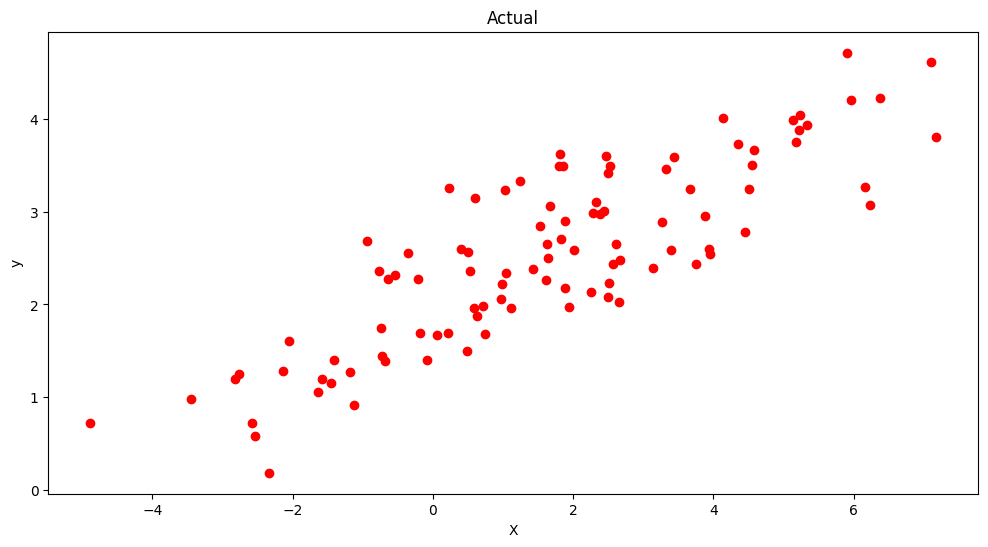

In [2]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

To estimate y using the OLS method, we need to calculate xmean and ymean, the covariance of X and y (xycov), and the variance of X (xvar) before we can determine the values for alpha and beta.

In [3]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


Great, we now have an estimate for alpha and beta! Our model can be written as **Yₑ = 2.003 + 0.323*X**, and we can make predictions:

In [5]:
ypred = alpha + beta * X

In [6]:
ypred

array([3.91178282, 2.81064315, 3.27775989, 4.29675991, 3.99534802,
       1.69857201, 3.25462968, 2.36537842, 2.40424288, 2.81907292,
       2.60387001, 3.66168312, 3.10199975, 2.58581077, 2.84592918,
       2.75696825, 3.69382011, 2.32194218, 2.74033151, 1.79802302,
       0.42642221, 3.015275  , 3.18547843, 1.88839019, 4.32006116,
       1.31339555, 2.52451965, 2.33645381, 3.72506464, 3.67386219,
       2.61267323, 2.79288576, 1.77082341, 0.88838207, 2.20668994,
       2.61380476, 3.48085076, 3.45831697, 2.17486854, 2.24351265,
       1.64102813, 1.34112617, 1.11002064, 4.06253353, 2.07610925,
       2.1338976 , 1.47613319, 3.11528277, 1.18459738, 2.31582084,
       1.76462232, 2.79994197, 2.07517841, 1.53439407, 2.46482364,
       2.83338994, 2.54127917, 2.73177699, 1.9754571 , 2.19471775,
       1.94466613, 2.19729158, 1.83108353, 1.09386364, 2.6308214 ,
       2.16319902, 1.17143718, 2.86120343, 1.75506992, 2.52951462,
       3.07620724, 2.59171079, 3.40747079, 1.49064088, 2.81240

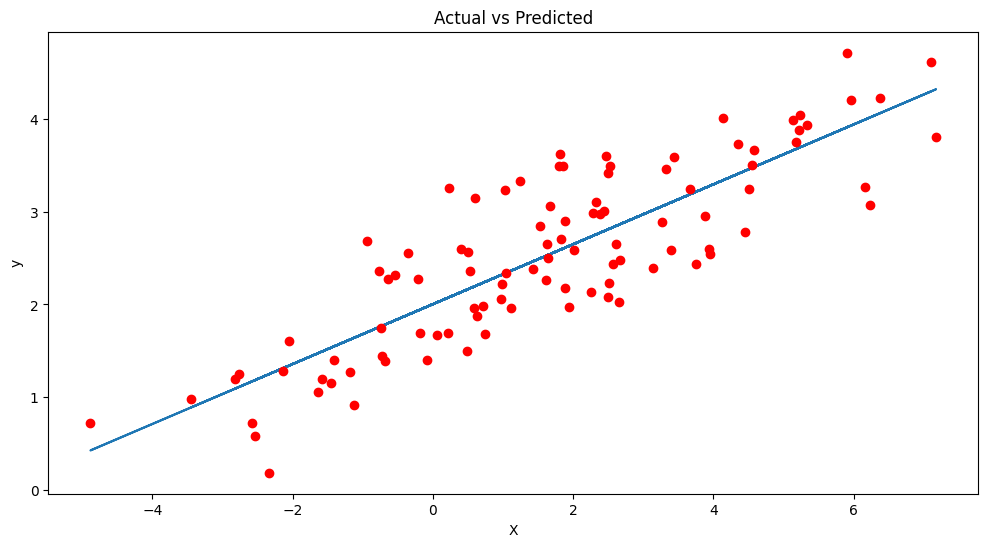

In [7]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

The blue line is our line of best fit, Yₑ = 2.003 + 0.323 X. We can see from this graph that there is a positive linear relationship between X and y. Using our model, we can predict y from any values of X!

For example, if we had a value X = 10, we can predict that:

Yₑ = 2.003 + 0.323 (10) = 5.233.

# Linear Regression with scikit-learn

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
df

,X,y,xycov,xvar
0,5.910131,4.714615,9.282815,18.152805
1,2.500393,2.076238,-0.391082,0.723985
2,3.946845,2.548811,0.029747,5.277702
3,7.102233,4.615368,11.338948,29.732079
4,6.168895,3.264107,3.291209,20.424750
...,...,...,...,...
95,3.266433,2.894157,0.579331,2.614407
96,1.526250,2.843770,-0.037956,0.015195
97,5.964676,4.201155,7.185997,18.620573
98,1.817280,3.626802,0.183016,0.028143


In [10]:
X = df[['X']].values
y = df['y'].values

In [11]:
model = LinearRegression()

In [12]:
model.fit(X,y)

LinearRegression()

In [13]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.003167012462343
betas = [0.32293969]


In [14]:
y_pred = model.predict(X)

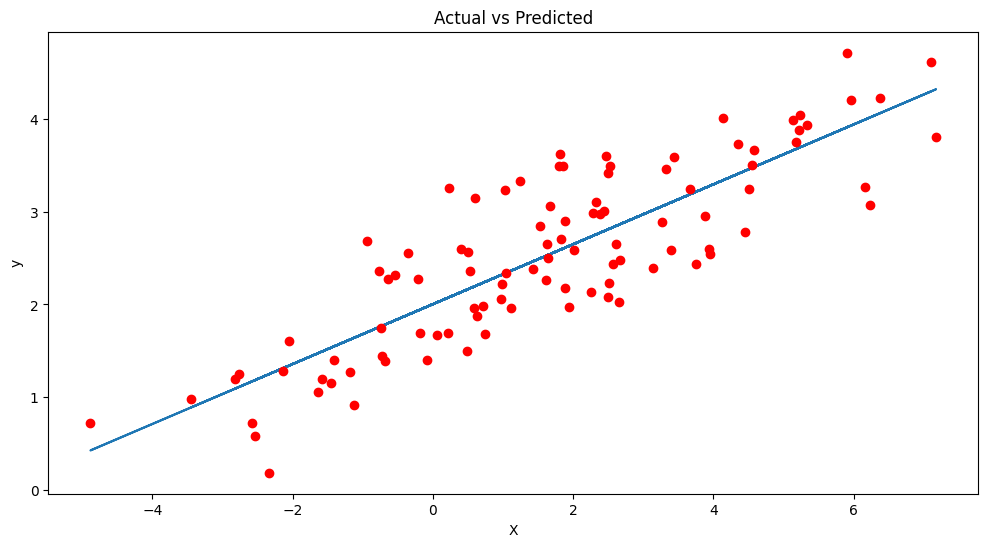

In [15]:
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

# Multivariate Regression

In [16]:
advert = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', usecols=['TV', 'Radio', 'Newspaper', 'Sales'])

In [17]:
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [19]:
X = advert[['TV', 'Radio', 'Newspaper']]
y = advert['Sales']

# Initialise and fit model
lm = LinearRegression()
model = lm.fit(X, y)

In [21]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 2.938889369459412
betas = [ 0.04576465  0.18853002 -0.00103749]


Therefore, our model can be written as:

Sales = 2.938 + 0.188*TV + 0.1880*Newspaper -0.001*Radio.

In [22]:
model.predict(X)

array([20.52397441, 12.33785482, 12.30767078, 17.59782951, 13.18867186,
       12.47834763, 11.72975995, 12.12295317,  3.72734086, 12.55084872,
        7.0322992 , 17.28512918, 10.57712073,  8.82630048, 18.43436638,
       20.81929952, 12.82365674, 23.22495716,  9.95168206, 14.16607293,
       18.10076728, 14.7405382 ,  6.4891503 , 16.5459329 ,  8.14651887,
       15.6100386 , 14.98951429, 17.05167344, 19.41053803,  9.14402389,
       21.6339338 , 11.3460929 ,  7.63888314, 18.86426829,  7.57483051,
       17.00682618, 23.40590052, 15.62347779,  9.90868103, 20.44761039,
       16.37766467, 17.2959832 , 21.59580326, 13.96385684,  8.88787996,
       15.16152314,  8.87338673, 21.7226299 , 16.26362018,  8.1681656 ,
       12.63121132,  9.33981296, 20.66297563, 19.94469957, 20.37443008,
       21.2926106 ,  8.52771254, 12.77458802, 21.89805198, 18.13348698,
        5.74215558, 22.89067208, 16.78426073, 13.21069202, 16.97773556,
        7.84904532,  9.01603163, 12.0370073 , 18.97657924, 21.10

Now that we’ve fit a multiple linear regression model to our data, we can predict sales from any combination of TV and Radio advertising costs! For example, if we wanted to know how many sales we would make if we invested 300 in TV advertising and 200 in Radio advertising…all we have to do is plug in the values!

In [23]:
new_X = [[300, 200, 50]]
print(model.predict(new_X))

[54.32241174]


/home/waheedabbas/Environments/cenv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


This means that if we spend 300 on TV advertising and 200 on Radio advertising and 50 on Newspaper, we should expect to see, on average, 54.32 units sold.

In [24]:
new_X = [[0, 0, 0]]
print(model.predict(new_X))

[2.93888937]


/home/waheedabbas/Environments/cenv/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Model Performance

Once you build the model, the next logical question comes in mind is to know whether your model is good enough to predict in future or the relationship which you built between dependent and independent variables is good enough or not.

## Resdual Plot

A residual value is a measure of how much a regression line vertically misses a data point. Regression lines are the best fit of a set of data. You can think of the lines as averages; a few data points will fit the line and others will miss. A residual plot has the Residual Values on the vertical axis; the horizontal axis displays the independent variable.

A residual plot is typically used to find problems with regression. Some data sets are not good candidates for regression, including:

- Heteroscedastic data (points at widely varying distances from the line).
- Data that is non-linearly associated.
- Data sets with outliers.

https://www.projectpro.io/data-science-in-r-programming-tutorial/linear-regression-tutorial

In [25]:
advert = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv', usecols=['TV', 'Sales'])

<AxesSubplot:xlabel='TV', ylabel='Sales'>

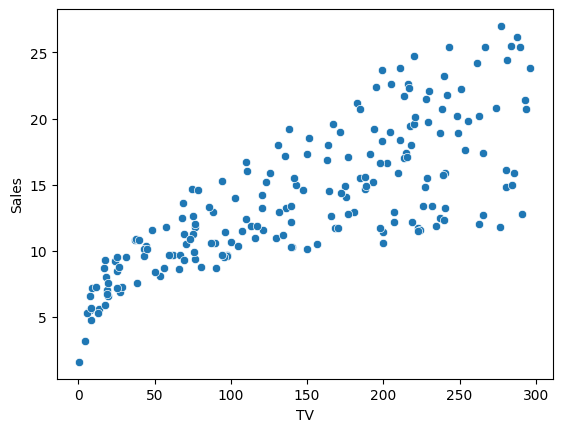

In [26]:
sns.scatterplot(data=advert, x='TV', y='Sales')

In [27]:
model = LinearRegression()
model.fit(advert[['TV']].values, advert['Sales'].values)

LinearRegression()

In [28]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 7.032593549127695
betas = [0.04753664]


Sales = 7.032 + 0.047TV

In [29]:
advert['y_pred'] = model.predict(advert[['TV']])

/home/waheedabbas/Environments/cenv/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [30]:
advert['resdual'] = advert['Sales'] - advert['y_pred']

<AxesSubplot:xlabel='y_pred', ylabel='resdual'>

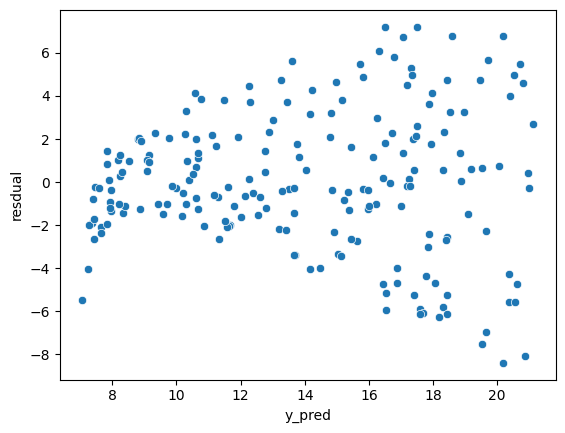

In [31]:
sns.scatterplot(data=advert, x='y_pred', y='resdual')

<AxesSubplot:xlabel='TV', ylabel='Sales'>

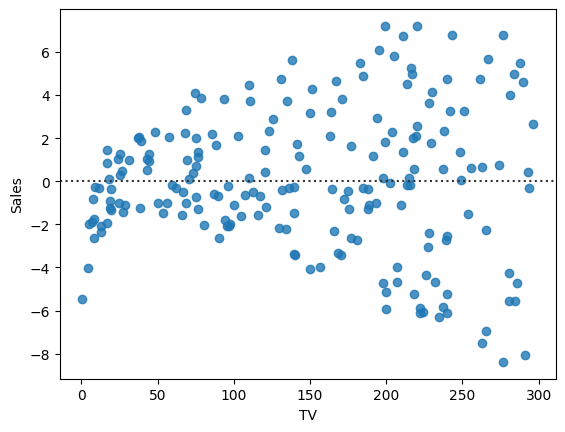

In [32]:
# alternative way using seaborn
sns.residplot(data=advert, x='TV', y='Sales')

## R Squared and Adjusted R Squared

### R2

Coefficient of determination also called as R2 score is used to evaluate the performance of a linear regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variable(s). It is used to check how well-observed results are reproduced by the model, depending on the ratio of total deviation of results described by the model.

**R2 = 1 - SSres / SStot**

SS = Sum of Squared

**Examples:** Case 1 Model gives accurate results

![http://media.geeksforgeeks.org/wp-content/uploads/20200603172827/img159.png](http://media.geeksforgeeks.org/wp-content/uploads/20200603172827/img159.png)

R2 = 1- 0/200 = 1

---

In [33]:
from sklearn.metrics import r2_score

In [34]:
# Generate 'random' data
np.random.seed(0)
X = 2.5 * np.random.randn(100) + 1.5   # Array of 100 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 100 residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [35]:
model = LinearRegression()
model.fit(df[['X']].values, df['y'].values)

LinearRegression()

In [36]:
df['y_pred'] = model.predict(df[['X']].values)

In [39]:
df.head()

,X,y,y_pred
0,5.910131,4.714615,3.911783
1,2.500393,2.076238,2.810643
2,3.946845,2.548811,3.277760
3,7.102233,4.615368,4.296760
4,6.168895,3.264107,3.995348


In [40]:
r2 = r2_score(df['y'], df['y_pred'])

In [41]:
print('R2:', r2)

R2: 0.7147163547202338


### Adjusted R2

Adjusted R-squared can provide a more precise view of that correlation by also taking into account how many independent variables are added to a particular model 

Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases when the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected. Typically, the adjusted R-squared is positive, not negative. It is always lower than the R-squared.

Adding more independent variables or predictors to a regression model tends to increase the R-squared value, which tempts makers of the model to add even more variables. This is called overfitting and can return an unwarranted high R-squared value. Adjusted R-squared is used to determine how reliable the correlation is and how much it is determined by the addition of independent variables.

In [43]:
n = len(df)
p = 1 # no of feature
Adj_r2_score = 1-(1-r2)*(n-1)/(n-p-1)

In [44]:
print('Adjusted R2:', Adj_r2_score)

Adjusted R2: 0.7118052971153381


## Mean Square Error(MSE)/Root Mean Square Error(RMSE)

While R Square is a relative measure of how well the model fits dependent variables, Mean Square Error is an absolute measure of the goodness for the fit.

![https://miro.medium.com/max/640/1*aFBAjR7kzWirbqORnYa43Q.png](https://miro.medium.com/max/640/1*aFBAjR7kzWirbqORnYa43Q.png)

MSE is calculated by the sum of square of prediction error which is real output minus predicted output and then divide by the number of data points. It gives you an absolute number on how much your predicted results deviate from the actual number. You cannot interpret many insights from one single result but it gives you a real number to compare against other model results and help you select the best regression model.

Root Mean Square Error(RMSE) is the square root of MSE. It is used more commonly than MSE because firstly sometimes MSE value can be too big to compare easily. Secondly, MSE is calculated by the square of error, and thus square root brings it back to the same level of prediction error and makes it easier for interpretation.

In [45]:
from sklearn.metrics import mean_squared_error
import math

In [47]:
df

,X,y,y_pred
0,5.910131,4.714615,3.911783
1,2.500393,2.076238,2.810643
2,3.946845,2.548811,3.277760
3,7.102233,4.615368,4.296760
4,6.168895,3.264107,3.995348
...,...,...,...
95,3.266433,2.894157,3.058028
96,1.526250,2.843770,2.496054
97,5.964676,4.201155,3.929398
98,1.817280,3.626802,2.590039


In [48]:
print('MSE:', mean_squared_error(df['y'], df['y_pred']))
print('RMSE:', math.sqrt(mean_squared_error(df['y'], df['y_pred'])))

MSE: 0.2642929635476573
RMSE: 0.5140943138643504


## Mean Absolute Error(MAE)

Mean Absolute Error(MAE) is similar to Mean Square Error(MSE). However, instead of the sum of square of error in MSE, MAE is taking the sum of the absolute value of error.

![https://miro.medium.com/max/640/1*tu6FSDz_FhQbR3UHQIaZNg.png](https://miro.medium.com/max/640/1*tu6FSDz_FhQbR3UHQIaZNg.png)

Compare to MSE or RMSE, MAE is a more direct representation of sum of error terms. MSE gives larger penalization to big prediction error by square it while MAE treats all errors the same.

In [49]:
from sklearn.metrics import mean_absolute_error
print('MAE:', mean_absolute_error(df['y'], df['y_pred']))

MAE: 0.43296956925233865


## Conclusion

R Square/Adjusted R Square is better used to explain the model to other people because you can explain the number as a percentage of the output variability. MSE, RMSE, or MAE are better be used to compare performance between different regression models. Personally, I would prefer using RMSE and I think Kaggle also uses it to assess the submission. However, it makes total sense to use MSE if the value is not too big and MAE if you do not want to penalize large prediction errors.

Adjusted R square is the only metric here that considers the overfitting problem. R Square has a direct library in Python to calculate but I did not find a direct library to calculate Adjusted R square except using the statsmodel results. If you really want to calculate Adjusted R Square, you can use statsmodel or use its mathematic formula directly.

# Polynomial Regression

**Polynomial Regression** is a form of linear regression in which the relationship between the independent variable x and dependent variable y is modeled as an nth degree polynomial. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x)

Why Polynomial Regression:
- There are some relationships that a researcher will hypothesize is curvilinear. Clearly, such types of cases will include a polynomial term.
- Inspection of residuals. If we try to fit a linear model to curved data, a scatter plot of residuals (Y-axis) on the predictor (X-axis) will have patches of many positive residuals in the middle. Hence in such a situation, it is not appropriate.
- An assumption in usual multiple linear regression analysis is that all the independent variables are independent. In polynomial regression model, this assumption is not satisfied.

y = a + bx + e

Here y is a dependent variable, a is the y-intercept, b is the slope and e is the error rate.
In many cases, this linear model will not work out For example if we analyzing the production of chemical synthesis in terms of temperature at which the synthesis take place in such cases we use a quadratic model 

y = a + b1x + b2^2 + e

![https://data36.com/wp-content/uploads/2021/11/degrees-of-polynomial-functions.png](https://data36.com/wp-content/uploads/2021/11/degrees-of-polynomial-functions.png)

linear regression is just a first-degree polynomial. Polynomial regression uses higher-degree polynomials. Both of them are linear models, but the first results in a straight line, the latter gives you a curved line. That’s it.

### Coding a polynomial regression model with scikit-learn

In [109]:
# dummy data
X = np.arange(0, 30).reshape(-1, 1)
y = [3, 4, 5, 7, 10, 8, 9, 10, 10, 23, 27, 44, 50, 63, 67, 60, 62, 70, 75, 88, 81, 87, 95, 100, 108, 135, 151, 160, 169, 179]

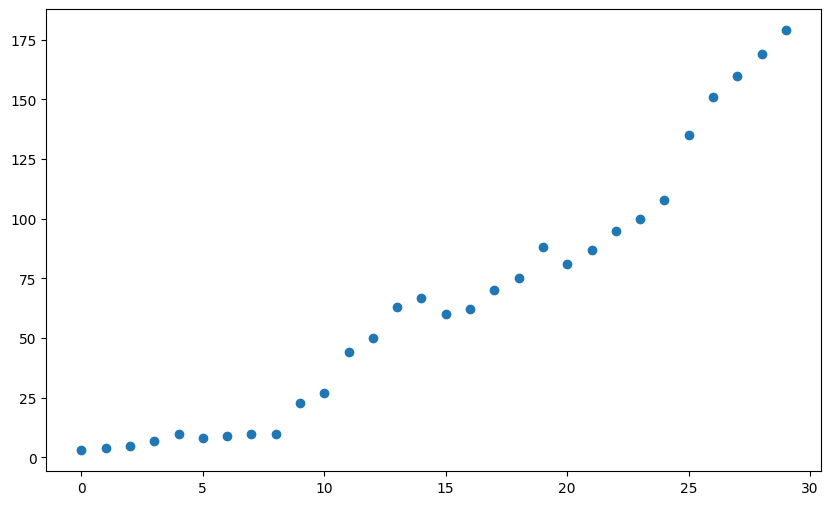

In [110]:
plt.figure(figsize=(10,6))
plt.scatter(X, y)
plt.show()

In [111]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [112]:
y_pred = model.predict(X)

In [113]:
math.sqrt(mean_squared_error(y, y_pred))

13.866548301026437

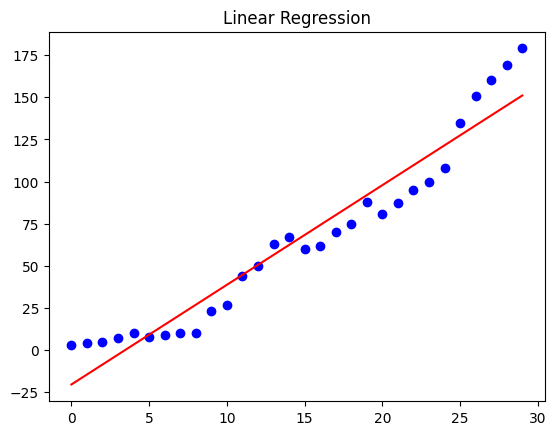

In [114]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')

plt.plot(X, y_pred, color = 'red')
plt.title('Linear Regression')
plt.show()

---

In [115]:
from sklearn.preprocessing import PolynomialFeatures

In [116]:
poly = PolynomialFeatures(degree=10, include_bias=False)

In [117]:
X_poly = poly.fit_transform(X)

In [118]:
X[0:5]

array([[0],
       [1],
       [2],
       [3],
       [4]])

In [119]:
X_poly[0:5]

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00, 1.000000e+00],
       [2.000000e+00, 4.000000e+00, 8.000000e+00, 1.600000e+01,
        3.200000e+01, 6.400000e+01, 1.280000e+02, 2.560000e+02,
        5.120000e+02, 1.024000e+03],
       [3.000000e+00, 9.000000e+00, 2.700000e+01, 8.100000e+01,
        2.430000e+02, 7.290000e+02, 2.187000e+03, 6.561000e+03,
        1.968300e+04, 5.904900e+04],
       [4.000000e+00, 1.600000e+01, 6.400000e+01, 2.560000e+02,
        1.024000e+03, 4.096000e+03, 1.638400e+04, 6.553600e+04,
        2.621440e+05, 1.048576e+06]])

In [120]:
model = LinearRegression()

In [121]:
model.fit(X_poly, y)

LinearRegression()

In [122]:
y_pred = model.predict(X_poly)

In [123]:
math.sqrt(mean_squared_error(y, y_pred))

3.9660935162216737

In [124]:
r2_score(y, y_pred)

0.9944089807583196

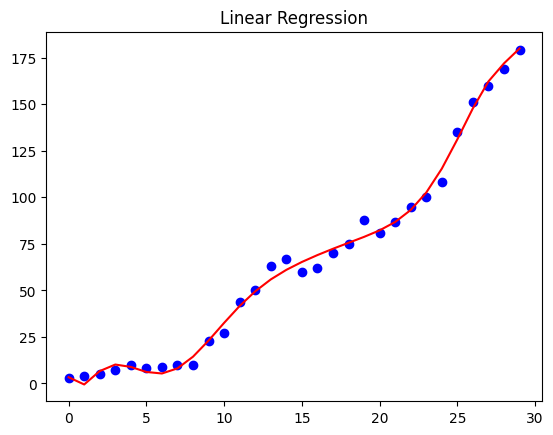

In [125]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')

plt.plot(X, y_pred, color = 'red')
plt.title('Linear Regression')
plt.show()

**Advantages of using Polynomial Regression:**
- A broad range of functions can be fit under it.
- Polynomial basically fits a wide range of curvatures.
- Polynomial provides the best approximation of the relationship between dependent and independent variables.

**Disadvantages of using Polynomial Regression:**
- These are too sensitive to the outliers.
- The presence of one or two outliers in the data can seriously affect the results of nonlinear analysis.
- In addition, there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.

https://data36.com/polynomial-regression-python-scikit-learn/